# Bike-Sharing-Demand_2

In [59]:
import pandas as pd
import numpy as np`
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc
import warnings

# 그래프 한글처리(from matplotlib import font_manager, rc)
fontname = font_manager.FontProperties(fname='C://myData//Fonts///malgun.ttf').get_name()
rc('font',family=fontname)

# notebook에 graph 출력
%matplotlib inline

# ggplot style 사용해 graph 출력
plt.style.use('ggplot')

# graph 한글폰트 사용시 마이너스 기호 출력 
mpl.rcParams['axes.unicode_minus'] = False

# warning 무시
warnings.filterwarnings("ignore")

In [60]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [61]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [62]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [63]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [64]:
# 연속형 feature & 범주형 feature
# 연속형 feature = ['temp','humidity','windspeed','atemp]'
# 범주형 feature => type을 category로 변경
categorical_feature_names = ["season","holiday","workingday","weather","dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [65]:
feature_names = ["season","weather","temp","atemp","humidity",
                    "year","hour","dayofweek","holiday","workingday"]
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [66]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head(10)

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0
5,1,2,9.84,12.880,75,2011,5,5,0,0
6,1,1,9.02,13.635,80,2011,6,5,0,0
7,1,1,8.20,12.880,86,2011,7,5,0,0
8,1,1,9.84,14.395,75,2011,8,5,0,0
9,1,1,13.12,17.425,76,2011,9,5,0,0


In [67]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(10)

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1
5,1,1,9.84,11.365,60,2011,5,3,0,1
6,1,1,9.02,10.605,60,2011,6,3,0,1
7,1,1,9.02,10.605,55,2011,7,3,0,1
8,1,1,9.02,10.605,55,2011,8,3,0,1
9,1,2,9.84,11.365,52,2011,9,3,0,1


In [68]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head(10)

(10886,)


0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: count, dtype: int64

In [69]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, converExp=True):
    if converExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)

    # 넘파이 배열 형태로 변경
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제값에 1을 더하고 로그 씌우기
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제 값을 빼주고 제곱
    difference = log_predict - log_actual
    difference = np.square(difference)

    # 평균을 낸 후 루트 씌우기
    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

### 선형회귀 모델 Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 선형회귀 모델을 초기화
lModel = LinearRegression()

# 모델 학습
y_train_log = np.log1p(y_train)
lModel.fit(X_train, y_train_log)

# 예측하고 정확도를 평가
preds = lModel.predict(X_train)
print("RMSLE Value For Linear Regression: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9803697923313504


### 릿지 Ridge

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780806


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

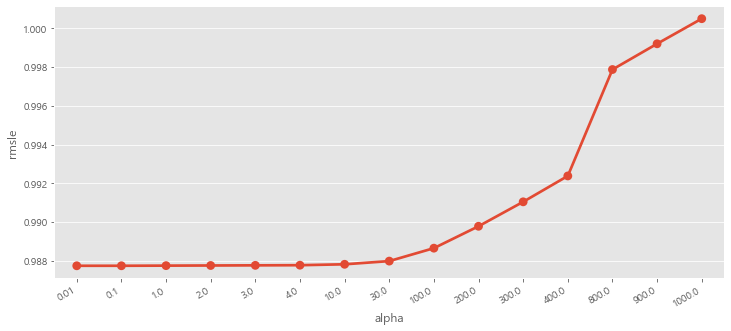

In [71]:
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring=rmsle_scorer, cv=5)
y_train_log = np.log1p(y_train)
grid_ridge_m.fit(X_train, y_train_log)
preds = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

### 라쏘 Lasso

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803727821457643


<AxesSubplot:xlabel='alpha', ylabel='rmsle'>

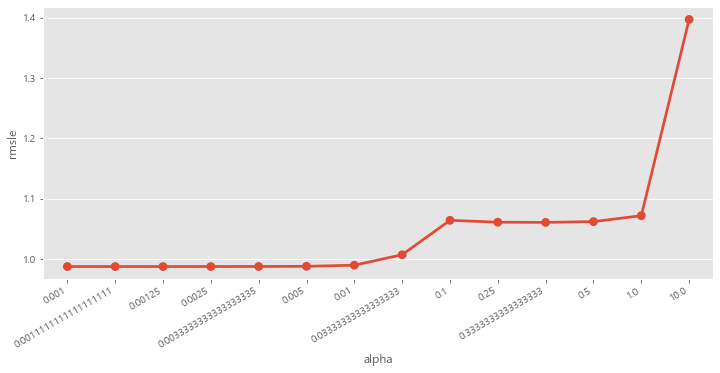

In [72]:
lasso_m_ = Lasso()

alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring=rmsle_scorer, cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit(X_train, y_train_log)
preds = grid_lasso_m.predict(X_train)
print(grid_lasso_m.best_params_)
print("RMSLE Value For Lasso Regression: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax)

### 앙상블모델 - 랜덤포레스트 Ensemble Models - Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

preds = rfModel.predict(X_train)

print("RMSLE Value For Random Forest: ", rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Random Forest:  0.10685762437892524


### 앙상블 모델 - 그라디언트 부스트 Ensemble Models - Gradient Boost

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.2135740372724937


[Text(0.5, 1.0, 'test')]

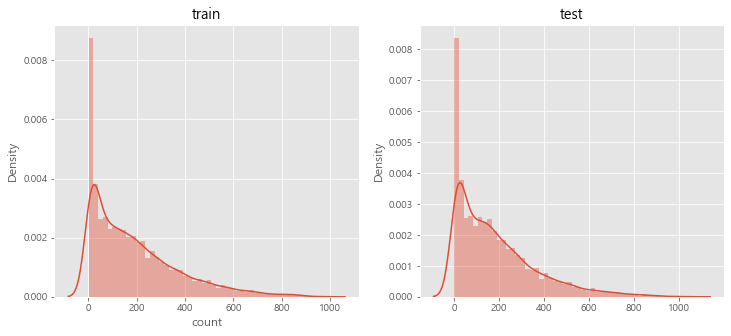

In [81]:
predsTest = gbm.predict(X_test)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title="train")
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)
ax2.set(title="test")

### Submit

In [82]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head(10)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918
5,2011-01-20 05:00:00,8.480762
6,2011-01-20 06:00:00,36.358568
7,2011-01-20 07:00:00,95.137949
8,2011-01-20 08:00:00,216.796073
9,2011-01-20 09:00:00,117.959646


In [83]:
submission.to_csv("data/Score_{0:.5f}_submission.csv".format(score),index=False)